In [1]:
# !pip install --upgrade idsl-gauge

In [2]:
from idsl_gauge import IDSLGauge
import pandas
import datetime
import os

In [3]:
os.environ['IDSL_GROUP'] = 'Indonesia'
os.environ['BATCH_DOWNLOAD_DAYS'] = '30'

In [4]:
# IDSL environment variables
group = os.environ.get('IDSL_GROUP')
days = int(os.environ.get('BATCH_DOWNLOAD_DAYS'))

max_latency = int(days * 24 * 60)
all_records = int(max_latency * 15)
max_records = max_latency

In [5]:
# Get station metadata
gauges = IDSLGauge(group, max_latency)
gauges.get_metadata()

In [6]:
gauges.metadata.head()

,Longitude,Latitude,Name,Sensor,Location,Country,Region,Provider,Latency_Seconds
id,,,,,,,,,
206,105.512106,-5.936047,IDSL-301,RAD,Sebesi,Indonesia,Lampung,JRC-MMAF,2
207,105.841088,-6.189322,IDSL-302,RAD,Marina Jambu,Indonesia,Banten,JRC-MMAF,11
208,99.585453,-2.037654,IDSL-303,RAD,Mentawai Tua Pejat,Indonesia,West Sumatra,JRC-MMAF,2
482,106.541573,-6.989507,IDSL-304,RAD,Pelabuhan Ratu,Indonesia,Jabar,JRC-MMAF,284928
483,100.396191,-1.029661,IDSL-305,RAD,Bungus Port,Indonesia,West Sumatra,JRC-MMAF,3


In [7]:
gauges.stations

['206', '207', '208', '482', '483', '484', '485', '486']

In [9]:
end = datetime.datetime.utcnow()
start = end - datetime.timedelta(minutes = max_latency)
station = gauges.stations[0]

In [10]:
# Use max_records for 1 minute data
df = gauges.get_gauges_data(station, start, end, max_records)
# Use all_records for full data
# df = gauges.get_gauges_data(station, start, end, all_records)

df['Latitude'] = gauges.metadata.loc[station].Latitude
df['Longitude'] = gauges.metadata.loc[station].Longitude
df['StationID'] = station
df.head()

,WaterLevelRadar,SolarPanel,RmsLimit,CPUTemperature,AmbientTemperature,Alert,AlertSignal,Battery,Forecast30,Forecast300,Latitude,Longitude,StationID
Timestamp,,,,,,,,,,,,,
2021-05-22 03:35:45,0.802915,-5.5,0.007997,47.599998,25.363369,0.0,0.004221,12.299477,0.803994,0.808215,-5.936047,105.512106,206
2021-05-22 03:36:18,0.821734,-5.5,0.007912,47.599998,25.357807,0.0,0.002060,12.314763,0.807005,0.809065,-5.936047,105.512106,206
2021-05-22 03:37:02,0.810219,-5.5,0.007898,47.599998,25.371700,0.0,0.004671,12.323468,0.816224,0.811553,-5.936047,105.512106,206
2021-05-22 03:37:46,0.807991,-5.5,0.007875,47.599998,25.348095,0.0,0.002649,12.333872,0.809860,0.812509,-5.936047,105.512106,206
2021-05-22 03:38:41,0.806170,-5.5,0.008056,47.599998,25.336994,0.0,0.006694,12.333235,0.806732,0.813426,-5.936047,105.512106,206


In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Timestamp'>

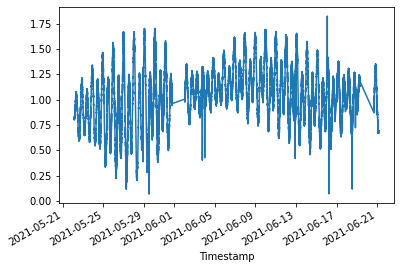

In [12]:
df.WaterLevelRadar.plot()